# Economic Data Analysis with FRED API

We will look at unemployment rates and participation rates of every state in the USA using the [FRED API](https://fredhelp.stlouisfed.org/fred/about/about-fred/what-is-fred/).

## I. Setup and Testing of FRED API

### 1. Install  FRED API

Kaggle notebooks don't have the FRED API installed by default, so we will need to **manually install** it in this.

In [1]:
!pip install fredapi

  Obtaining dependency information for fredapi from https://files.pythonhosted.org/packages/96/d4/f81fa9f67775a6a4b9e2cd8487239d61a9698cb2b9c02a5a2897d310f7a4/fredapi-0.5.1-py3-none-any.whl.metadata


In [2]:
!pip show fredapi

Name: fredapi
Version: 0.5.1
Summary: Python API for Federal Reserve Economic Data (FRED) from St. Louis Fed
Home-page: https://github.com/mortada/fredapi
Author: Mortada Mehyar
Author-email: 
License: 
Location: /opt/conda/lib/python3.10/site-packages
Requires: pandas
Required-by: 


### 1.1 Request for FRED API Key

To get your own FRED API key:

1. Register for an account in [FRED](https://fred.stlouisfed.org/docs/api/fred/)
2. Go to `My Account > API Keys`
3. Click the Request API Key button
4. Copy the API key generated for your account

After doing those steps, you then have to paste your API key onto Kaggle Secrets: 
1. Head on to `Add-ons > Secrets`
2. Click the `Add a new secret` button.
3. Paste the API key

You can then proceed to import the libraries required for analysis.

### 2. Import libraries

In [3]:
# Data manipulation
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 500)

# Plotting
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# Plot aesthetics
plt.style.use('fivethirtyeight')
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']

# FRED API
from fredapi import Fred

# Load the FRED API key from Kaggle Secrets
from kaggle_secrets import UserSecretsClient
user_secrets = UserSecretsClient()
fred_key = user_secrets.get_secret('fred-api')

### 3. Create Fred object

In [4]:
fred = Fred(api_key=fred_key)
fred

### 4. Begin Search for Economic Data

We'll just test here how the FRED API's `.search()` method works.

In [5]:
nasdaq_search = fred.search('NASDAQ', order_by='popularity')
nasdaq_search.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
SP500,SP500,2023-11-22,2023-11-22,S&P 500,2013-11-25,2023-11-22,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2023-11-22 19:10:59-06:00,83,The observations for the S&P 500 represent the...
NASDAQCOM,NASDAQCOM,2023-11-22,2023-11-22,NASDAQ Composite Index,1971-02-05,2023-09-25,"Daily, Close",D,"Index Feb 5, 1971=100","Index Feb 5, 1971=100",Not Seasonally Adjusted,NSA,2023-09-26 07:07:02-05:00,69,The observations for the NASDAQ Composite Inde...
NASDAQ100,NASDAQ100,2023-11-22,2023-11-22,NASDAQ 100 Index,1986-01-02,2023-09-25,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2023-09-26 07:07:01-05:00,57,The observations for the NASDAQ 100 Index repr...
VXNCLS,VXNCLS,2023-11-22,2023-11-22,CBOE NASDAQ 100 Volatility Index,2001-02-02,2023-11-21,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2023-11-22 08:36:05-06:00,36,"Copyright, 2016, Chicago Board Options Exchang..."


In [6]:
nasdaq_search.shape

(4, 15)

### 4.1 Pull raw data

Now we'll test pulling out data using the `.get_series()` method and make a quick plot.

<Axes: >

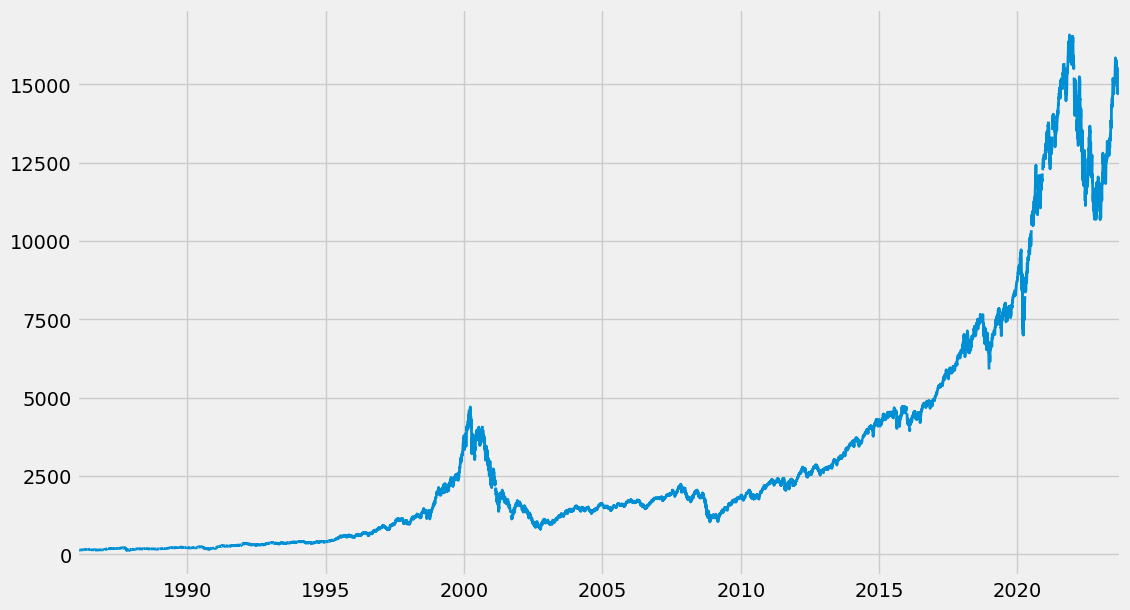

In [7]:
fred.get_series(series_id='NASDAQ100').plot(lw=2, figsize=(12, 7))

## II. Unemployment Rate Analysis

### 1. Pull and Join Multiple Data Series

Now let's pull some data for unemployment rates in the USA per state

In [8]:
unemployment_df = fred.search('unemployment rate state', filter=('frequency', 'Monthly'))
unemployment_df = unemployment_df.query('seasonal_adjustment == "Seasonally Adjusted" and' +
                                        ' units == "Percent"')
unemployment_df = unemployment_df.loc[unemployment_df['title'].str.contains('Unemployment Rate')]
unemployment_df

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2023-11-22,2023-11-22,Unemployment Rate,1948-01-01,2023-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-11-03 07:50:02-05:00,94,The unemployment rate represents the number of...
LNS14000006,LNS14000006,2023-11-22,2023-11-22,Unemployment Rate - Black or African American,1972-01-01,2023-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-11-03 07:50:06-05:00,67,The series comes from the 'Current Population ...
CAUR,CAUR,2023-11-22,2023-11-22,Unemployment Rate in California,1976-01-01,2023-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-11-20 11:19:01-06:00,61,None
M0892AUSM156SNBR,M0892AUSM156SNBR,2023-11-22,2023-11-22,Unemployment Rate for United States,1929-04-01,1942-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2012-08-17 14:26:06-05:00,54,Series Is Presented Here As Three Variables--(...
M0892BUSM156SNBR,M0892BUSM156SNBR,2023-11-22,2023-11-22,Unemployment Rate for United States,1940-01-01,1946-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2012-08-17 14:29:19-05:00,12,Series Is Presented Here As Three Variables--(...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LNS14000093,LNS14000093,2023-11-22,2023-11-22,Unemployment Rate - 45-54 Yrs.,1948-01-01,2023-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-11-03 07:51:45-05:00,3,The series comes from the 'Current Population ...
LNS14000062,LNS14000062,2023-11-22,2023-11-22,"Unemployment Rate - 25-54 Yrs., Women",1948-01-01,2023-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-11-03 07:51:46-05:00,3,To obtain estimates of women worker employment...
LNS14023569,LNS14023569,2023-11-22,2023-11-22,Unemployment Rate - New Entrants,1967-01-01,2023-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-11-03 07:51:45-05:00,3,The series comes from the 'Current Population ...


In [9]:
all_results = []

for myid in unemployment_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    
    all_results.append(results)

In [10]:
type(all_results)

list

In [11]:
all_results[0]

,UNRATE
1948-01-01,3.4
1948-02-01,3.8
1948-03-01,4.0
1948-04-01,3.9
1948-05-01,3.5
...,...
2023-06-01,3.6
2023-07-01,3.5
2023-08-01,3.8
2023-09-01,3.8


In [12]:
all_results[1]

,LNS14000006
1972-01-01,11.2
1972-02-01,11.2
1972-03-01,10.7
1972-04-01,9.8
1972-05-01,10.2
...,...
2023-06-01,6.0
2023-07-01,5.8
2023-08-01,5.3
2023-09-01,5.7


We see here that `all_results` is a list containing DataFrames indexed by `datetime`. We then concatenate the list of DataFrames as columns to the `unemployment_results` DataFrame.

In [13]:
unemployment_results = pd.concat(all_results, axis=1)
unemployment_results

,UNRATE,LNS14000006,CAUR,M0892AUSM156SNBR,M0892BUSM156SNBR,TXUR,NYUR,LNS14000024,U2RATE,LNS14000002,FLUR,LNS14000031,LNS14000009,LNS14027660,LNS14027662,LNS14000003,MIUR,OHUR,LNS14000001,LNS14024887,ALUR,COUR,PAUR,LRUN64TTUSM156S,NCUR,ILUR,KYUR,MAUR,MNUR,GAUR,LNS14027659,WIUR,VAUR,NJUR,AZUR,NMUR,WAUR,AKUR,MDUR,ORUR,IAUR,SCUR,LNS14032183,TNUR,LNS14000012,WVUR,INUR,ARUR,MOUR,LAUR,UTUR,NVUR,NDUR,HIUR,OKUR,LASMT261982000000003,PRUR,MTUR,CTUR,MSUR,DCUR,KSUR,LNS14000036,IDUR,LNS14000060,LNS14000018,WYUR,NEUR,NHUR,RIUR,MEUR,SDUR,LASMT391746000000003,DEUR,VTUR,CMWRUR,LNS14000028,LNS14000032,LNS14027689,LNS14024230,CNERUR,LNS14000048,CSOUUR,LNS14000089,LRUNTTTTUSM156S,LNS14000026,LNS14200000,LNS14000025,LRUN24TTUSM156S,LNS14000315,LNS14100000,LNS14000029,LNS14023705,CNEWUR,LRUN25TTUSM156S,LNS14000150,LNS14000093,LNS14000062,LNS14023569,CWSTUR,LRUN25MAUSM156S
1929-04-01,NaN,NaN,NaN,0.69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-05-01,NaN,NaN,NaN,1.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-06-01,NaN,NaN,NaN,2.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-07-01,NaN,NaN,NaN,0.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-08-01,NaN,NaN,NaN,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-01,3.6,6.0,4.6,NaN,NaN,4.1,3.9,3.3,1.7,3.4,2.6,5.9,4.3,3.9,2.0,3.1,3.6,3.4,3.7,7.5,2.2,2.8,3.8,3.635787,3.3,4.0,3.8,2.6,2.9,3.2,6.0,2.5,2.7,3.7,3.5,3.5,3.8,3.7,2.0,3.5,2.7,3.1,3.2,3.2,11.0,3.3,3.2,2.6,2.6,3.6,2.4,5.4,2.0,3.0,2.7,2.9,6.1,2.4,3.7,3.1,5.1,2.8,6.1,2.7,3.1,15.6,3.1,1.9,1.8,2.9,2.4,1.8,3.7,4.2,1.9,3.2,3.0,5.4,3.1,2.6,3.5,3.0,3.2,3.9,3.6,3.1,4.0,3.4,7.5,2.2,3.5,2.6,0.5,2.8,3.1,1.8,2.4,3.2,0.3,4.0,3.0
2023-07-01,3.5,5.8,4.6,NaN,NaN,4.1,3.9,3.2,1.6,3.4,2.7,5.3,4.4,3.4,2.0,3.1,3.6,3.3,3.6,8.0,2.1,2.9,3.5,3.637014,3.3,4.0,3.9,2.5,3.0,3.2,5.2,2.6,2.5,3.9,3.6,3.6,3.6,3.8,1.8,3.4,2.7,3.1,2.3,3.1,11.3,3.4,3.3,2.6,2.7,3.4,2.4,5.3,2.0

**US states** in the dataset are represented with **4 uppercase characters** instead of 2 in the naming convention. Here are some examples:

In [14]:
unemployment_df.loc['NYUR']  # Unemployment rate in New York

id                                                    NYUR
realtime_start                         2023-11-22 00:00:00
realtime_end                           2023-11-22 00:00:00
title                        Unemployment Rate in New York
observation_start                      1976-01-01 00:00:00
observation_end                        2023-10-01 00:00:00
frequency                                          Monthly
frequency_short                                          M
units                                              Percent
units_short                                              %
seasonal_adjustment                    Seasonally Adjusted
seasonal_adjustment_short                               SA
last_updated                     2023-11-20 11:19:02-06:00
popularity                                              52
notes                                                 None
Name: NYUR, dtype: object

In [15]:
unemployment_df.loc['MAUR']  # Unemploynent rate in Massachusetts

id                                                         MAUR
realtime_start                              2023-11-22 00:00:00
realtime_end                                2023-11-22 00:00:00
title                        Unemployment Rate in Massachusetts
observation_start                           1976-01-01 00:00:00
observation_end                             2023-10-01 00:00:00
frequency                                               Monthly
frequency_short                                               M
units                                                   Percent
units_short                                                   %
seasonal_adjustment                         Seasonally Adjusted
seasonal_adjustment_short                                    SA
last_updated                          2023-11-20 11:19:05-06:00
popularity                                                   35
notes                                                      None
Name: MAUR, dtype: object

In [16]:
unemployment_df.loc['NHUR']  # Unemployment rate in Hampshire

id                                                         NHUR
realtime_start                              2023-11-22 00:00:00
realtime_end                                2023-11-22 00:00:00
title                        Unemployment Rate in New Hampshire
observation_start                           1976-01-01 00:00:00
observation_end                             2023-10-01 00:00:00
frequency                                               Monthly
frequency_short                                               M
units                                                   Percent
units_short                                                   %
seasonal_adjustment                         Seasonally Adjusted
seasonal_adjustment_short                                    SA
last_updated                          2023-11-20 11:19:13-06:00
popularity                                                   15
notes                                                      None
Name: NHUR, dtype: object

Let's loop through the columns and filter out columns to drop with characters greater than 4. We can save this into a list and **drop fields that are not US States.**

In [17]:
columns_to_drop = []

for cols in unemployment_results.columns:
    if len(cols) > 4:
        columns_to_drop.append(cols)

columns_to_drop

['UNRATE',
 'LNS14000006',
 'M0892AUSM156SNBR',
 'M0892BUSM156SNBR',
 'LNS14000024',
 'U2RATE',
 'LNS14000002',
 'LNS14000031',
 'LNS14000009',
 'LNS14027660',
 'LNS14027662',
 'LNS14000003',
 'LNS14000001',
 'LNS14024887',
 'LRUN64TTUSM156S',
 'LNS14027659',
 'LNS14032183',
 'LNS14000012',
 'LASMT261982000000003',
 'LNS14000036',
 'LNS14000060',
 'LNS14000018',
 'LASMT391746000000003',
 'CMWRUR',
 'LNS14000028',
 'LNS14000032',
 'LNS14027689',
 'LNS14024230',
 'CNERUR',
 'LNS14000048',
 'CSOUUR',
 'LNS14000089',
 'LRUNTTTTUSM156S',
 'LNS14000026',
 'LNS14200000',
 'LNS14000025',
 'LRUN24TTUSM156S',
 'LNS14000315',
 'LNS14100000',
 'LNS14000029',
 'LNS14023705',
 'CNEWUR',
 'LRUN25TTUSM156S',
 'LNS14000150',
 'LNS14000093',
 'LNS14000062',
 'LNS14023569',
 'CWSTUR',
 'LRUN25MAUSM156S']

In [19]:
unemployment_states = unemployment_results \
    .drop(columns=columns_to_drop, axis=1) \
    .drop(columns='PRUR', axis=1)

unemployment_states

,CAUR,TXUR,NYUR,FLUR,MIUR,OHUR,ALUR,COUR,PAUR,NCUR,ILUR,KYUR,MAUR,MNUR,GAUR,WIUR,VAUR,NJUR,AZUR,NMUR,WAUR,AKUR,MDUR,ORUR,IAUR,SCUR,TNUR,WVUR,INUR,ARUR,MOUR,LAUR,UTUR,NVUR,NDUR,HIUR,OKUR,MTUR,CTUR,MSUR,DCUR,KSUR,IDUR,WYUR,NEUR,NHUR,RIUR,MEUR,SDUR,DEUR,VTUR
1929-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-01,4.6,4.1,3.9,2.6,3.6,3.4,2.2,2.8,3.8,3.3,4.0,3.8,2.6,2.9,3.2,2.5,2.7,3.7,3.5,3.5,3.8,3.7,2.0,3.5,2.7,3.1,3.2,3.3,3.2,2.6,2.6,3.6,2.4,5.4,2.0,3.0,2.7,2.4,3.7,3.1,5.1,2.8,2.7,3.1,1.9,1.8,2.9,2.4,1.8,4.2,1.9
2023-07-01,4.6,4.1,3.9,2.7,3.6,3.3,2.1,2.9,3.5,3.3,4.0,3.9,2.5,3.0,3.2,2.6,2.5,3.9,3.6,3.6,3.6,3.8,1.8,3.4,2.7,3.1,3.1,3.4,3.3,2.6,2.7,3.4,2.4,5.3,2.0,2.8,2.7,2.5,3.6,3.0,5.0,2.7,2.8,3.0,2.0,1.7,2.8,2.4,1.9,4.1,1.8
2023-08-01,4.6,4.1,3.9,2.7,3.7,3.4,2.1,3.1,3.5,3.3,4.1,4.0,2.6,3.1,3.3,2.9,2.5,4.2,3.8,3.7,3.6,3.9,1.7,3.4,2.9,3.0,3.1,3.6,3.4,2.7,2.8,3.3,2.5,5.4,1.9,2.8,2.8,2.5,3.5,3.2,5.0,2.7,3.0,2.9,2.0,1.8,2.7,2.5,1.9,4.1,1.8
2023-09-01,4.7,4.1,4.0,2.8,3.9,3.4,2.2,3.2,3.4,3.4,4.4,4.1,2.6,3.1,3.4,3.1,2.5,4.4,4.0,3.7,3.6,4.1,1.6,3.5,3.0,2.9,3.2,3.8,3.6,2.9,2.9,3.3,2.6,5.4,1.9,2.8,3.0,2.7,3.5,3.2,5.0,2.8,3.1,2.9,2.1,2.0,2.6,2.7,1.9,4.1,1.9


In [20]:
for index, cols in enumerate(unemployment_states.columns):
    print(index, cols)

0 CAUR
1 TXUR
2 NYUR
3 FLUR
4 MIUR
5 OHUR
6 ALUR
7 COUR
8 PAUR
9 NCUR
10 ILUR
11 KYUR
12 MAUR
13 MNUR
14 GAUR
15 WIUR
16 VAUR
17 NJUR
18 AZUR
19 NMUR
20 WAUR
21 AKUR
22 MDUR
23 ORUR
24 IAUR
25 SCUR
26 TNUR
27 WVUR
28 INUR
29 ARUR
30 MOUR
31 LAUR
32 UTUR
33 NVUR
34 NDUR
35 HIUR
36 OKUR
37 MTUR
38 CTUR
39 MSUR
40 DCUR
41 KSUR
42 IDUR
43 WYUR
44 NEUR
45 NHUR
46 RIUR
47 MEUR
48 SDUR
49 DEUR
50 VTUR


### 2. Checking for missing values

<Axes: >

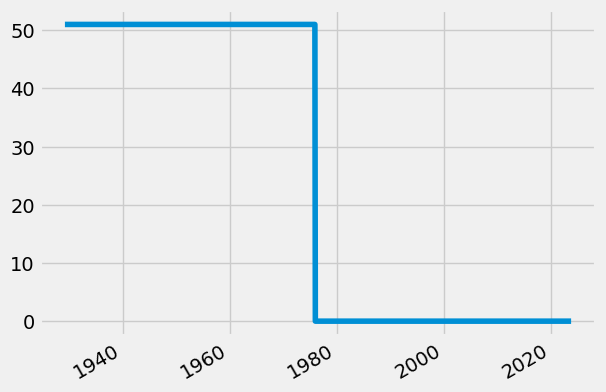

In [21]:
unemployment_states.isna().sum(axis=1).plot()

We can just choose to drop the missing values as **we have no way of collecting US unemployment rate data from the past that is gathered by the US Federal Reserve**.

We also fix the column names of the states from 4 characters to their actual names to make it more understandable.

In [22]:
unemployment_states = unemployment_states.dropna()
id_to_state = unemployment_df['title'].str.replace('Unemployment Rate in', '').to_dict()
unemployment_states.columns = [id_to_state[col] for col in unemployment_states.columns]

In [23]:
unemployment_states

,California,Texas,New York,Florida,Michigan,Ohio,Alabama,Colorado,Pennsylvania,North Carolina,Illinois,Kentucky,Massachusetts,Minnesota,Georgia,Wisconsin,Virginia,New Jersey,Arizona,New Mexico,Washington,Alaska,Maryland,Oregon,Iowa,South Carolina,Tennessee,West Virginia,Indiana,Arkansas,Missouri,Louisiana,Utah,Nevada,North Dakota,Hawaii,Oklahoma,Montana,Connecticut,Mississippi,the District of Columbia,Kansas,Idaho,Wyoming,Nebraska,New Hampshire,Rhode Island,Maine,South Dakota,Delaware,Vermont
1976-01-01,9.2,5.8,10.3,9.7,9.9,8.1,6.6,5.8,8.0,6.4,6.6,5.6,10.5,6.0,8.4,5.8,6.1,10.3,10.2,8.6,8.5,7.1,6.4,9.5,4.3,7.4,6.0,7.5,6.6,7.3,5.9,6.3,5.8,9.2,3.4,9.8,5.8,5.8,9.8,6.7,8.7,4.2,5.6,4.1,3.3,6.5,7.8,8.7,3.3,8.0,8.6
1976-02-01,9.2,5.8,10.3,9.7,9.9,8.1,6.6,5.7,8.1,6.4,6.6,5.6,10.5,6.0,8.4,5.8,6.1,10.3,10.2,8.7,8.5,7.1,6.4,9.5,4.3,7.4,6.0,7.5,6.6,7.3,5.9,6.3,5.9,9.2,3.4,9.8,5.8,5.8,9.8,6.7,8.7,4.2,5.6,4.1,3.3,6.5,7.8,8.7,3.3,8.0,8.6
1976-03-01,9.1,5.9,10.2,9.6,9.9,8.1,6.6,5.7,8.1,6.4,6.6,5.6,10.5,5.9,8.4,5.7,6.1,10.3,10.1,8.7,8.4,7.0,6.4,9.4,4.3,7.3,6.0,7.5,6.5,7.3,5.9,6.3,5.8,9.2,3.4,9.8,5.8,5.8,9.8,6.6,8.6,4.2,5.6,4.1,3.3,6.5,7.7,8.6,3.2,8.0,8.6
1976-04-01,9.1,5.9,10.2,9.5,9.8,8.0,6.5,5.6,8.1,6.3,6.6,5.6,10.3,5.8,8.3,5.6,6.0,10.3,10.0,8.6,8.5,6.9,6.4,9.2,4.2,7.2,6.0,7.5,6.3,7.2,6.0,6.4,5.8,9.0,3.5,9.7,5.8,5.8,9.6,6.4,8.5,4.2,5.6,4.0,3.2,6.5,7.7,8.6,3.1,8.1,8.6
1976-05-01,9.0,5.9,10.1,9.3,9.6,7.8,6.4,5.6,8.1,6.1,6.6,5.5,10.1,5.7,8.1,5.5,5.9,10.3,9.8,8.6,8.5,6.9,6.5,9.1,4.1,7.0,5.9,7.4,6.0,7.1,6.0,6.5,5.7,8.9,3.6,9.4,5.7,5.8,9.4,6.3,8.4,4.2,5.6,3.9,3.1,6.5,7.7,8.5,3.1,8.3,8.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-01,4.6,4.1,3.9,2.6,3.6,3.4,2.2,2.8,3.8,3.3,4.0,3.8,2.6,2.9,3.2,2.5,2.7,3.7,3.5,3.5,3.8,3.7,2.0,3.5,2.7,3.1,3.2,3.3,3.2,2.6,2.6,3.6,2.4,5.4,2.0,3.0,2.7,2.4,3.7,3.1,5.1,2.8,2.7,3.1,1.9,1.8,2.9,2.4,1.8,4.2,1.9
2023-07-01,4.6,4.1,3.9,2.7,3.6,3.3,2.1,2.9,3.5,3.3,4.0,3.9,2.5,3.0,3.2,2.6,2.5,3.9,3.6,3.6,3.6,3.8,1.8,3.4,2.7,3.1,3.1,3.4,3.3,2.6,2.7,3.4,2.4,5.3,2.0,2.8,2.7,2.5,3.6,3.0,5.0,2.7,2.8,3.0,2.0,1.7,2.8,2.4,1.9,4.1,1.8
2023-08-01,4.6,4.1,3.9,2.7,3.7,3.4,2.1,3.1,3.5,3.3,4.1,4.0,2.6,3.1,3.3,2.9,2.5,4.2,3.8,3.7,3.6,3.9,1.7,3.4,2.9,3.0,3.1,3.6,3.4,2.7,2.8,3.3,2.5,5.4,1.9,2.8,2.8,2.5,3.5,3.2,5.0,2.7,3.0,2.9,2.0,1.8,2.7,2.5,1.9,4.1,1.8
2023-09-01,4.7,4.1,4.0,2.8,3.9,3.4,2.2,3.2,3.4,3.4,4.4,4.1,2.6,3.1,3.4,3.1,2.5,4.4,4.0,3.7,3.6,4.1,1.6,3.5,3.0,2.9,3.2,3.8,3.6,2.9,2.9,3.3,2.6,5.4,1.9,2.8,3.0,2.7,3.5,3.2,5.0,2.8,3.1,2.9,2.1,2.0,2.6,2.7,1.9,4.1,1.9


We now have more **readable US State Columns**

### 3. Visualize Unemployment Rate by US State

Let us visualize **unemployment rates by US for every month over the years**. To make it interactive we'll make use of `plotly.express` which is an interactive graphing library for Python.

In [24]:
fig = px.line(data_frame=unemployment_states,
              title='Unemployment Rate by USA State',
             labels={
                 'index': 'Month & Year',
                 'value': 'Unemployment Rate',
                 'variable': 'State'
             },
             markers=True)

fig.show()

It can be seen that the most recent month and year where unemployment rate was at its peak occurred on **May 2020 (2020-05-01)**. Let's try pulling out the data from that time.

### 4. Pull May 2020 Unemployment Rate Data

In [26]:
unemployment_states.loc[unemployment_states.index == '2020-05-01']

,California,Texas,New York,Florida,Michigan,Ohio,Alabama,Colorado,Pennsylvania,North Carolina,Illinois,Kentucky,Massachusetts,Minnesota,Georgia,Wisconsin,Virginia,New Jersey,Arizona,New Mexico,Washington,Alaska,Maryland,Oregon,Iowa,South Carolina,Tennessee,West Virginia,Indiana,Arkansas,Missouri,Louisiana,Utah,Nevada,North Dakota,Hawaii,Oklahoma,Montana,Connecticut,Mississippi,the District of Columbia,Kansas,Idaho,Wyoming,Nebraska,New Hampshire,Rhode Island,Maine,South Dakota,Delaware,Vermont
2020-05-01,15.7,11.6,16.6,14.1,19.1,12.7,10.4,11.6,12.9,11.6,14.7,12.8,15.5,11.1,9.7,10.5,10.0,15.3,11.2,9.3,13.2,11.9,8.8,11.8,8.3,9.2,12.1,12.4,12.4,8.9,9.5,12.2,7.7,24.7,7.2,20.8,9.7,9.2,11.7,11.2,8.8,9.3,9.0,8.7,6.3,11.7,15.4,9.4,6.6,13.4,9.5


Using `.T` allows us to flip the columns and the rows. This way:

- the **US states become the index**
- the **specified date (May 01, 2020) becomes the column** 

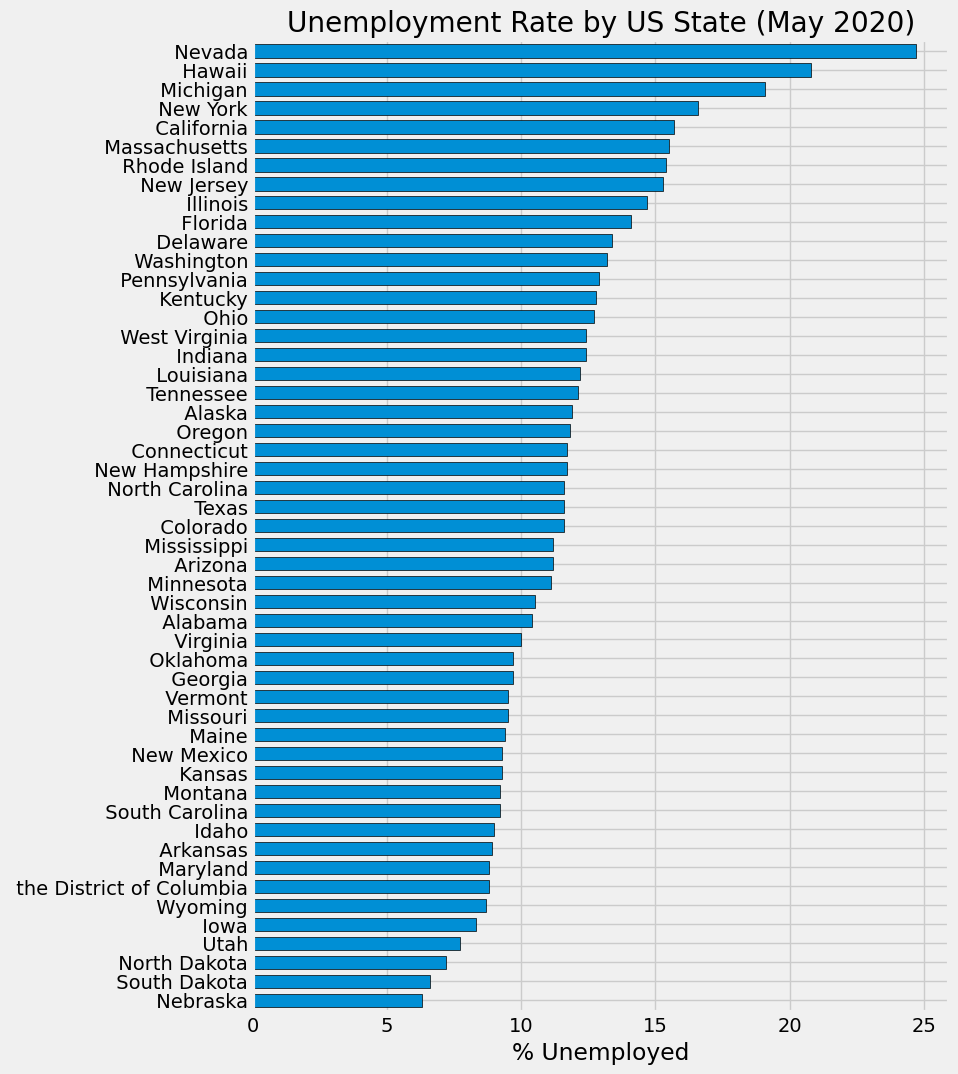

In [27]:
ax = unemployment_states.loc[unemployment_states.index == '2020-05-01'].T \
        .sort_values('2020-05-01') \
        .plot(kind='barh', figsize=(8, 12),
              xlabel='% Unemployed',
              edgecolor='black', width=0.7,
              title='Unemployment Rate by US State (May 2020)')

ax.legend().remove()

plt.show()

The state names are pretty hard to read. A workaround for this would be to:

1. Remove the 'Unemployment Rate in' string from the `'title'` column
2. Use `.to_dict()` to make a hash map of the column names
3. Do list comprehension to take in the more readable names of the US states

## III. Participation Rate Analysis

Now that we have unemployment rate data, let's **begin pulling participation rate data.**

### 1. Pull Participation Rate

In [28]:
participation_df = fred.search('participation rate state', filter=('frequency', 'Monthly'))
participation_df = participation_df.query('seasonal_adjustment == "Seasonally Adjusted" and ' +
                                          'units == "Percent"')

participation_df

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
CIVPART,CIVPART,2023-11-22,2023-11-22,Labor Force Participation Rate,1948-01-01,2023-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-11-03 07:50:02-05:00,83,The series comes from the 'Current Population ...
LNS11300060,LNS11300060,2023-11-22,2023-11-22,Labor Force Participation Rate - 25-54 Yrs.,1948-01-01,2023-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-11-03 07:50:11-05:00,65,The series comes from the 'Current Population ...
LNS11300002,LNS11300002,2023-11-22,2023-11-22,Labor Force Participation Rate - Women,1948-01-01,2023-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-11-03 07:50:09-05:00,65,To obtain estimates of women worker employment...
LNS11300001,LNS11300001,2023-11-22,2023-11-22,Labor Force Participation Rate - Men,1948-01-01,2023-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-11-03 07:50:14-05:00,57,The series comes from the 'Current Population ...
LNS11324230,LNS11324230,2023-11-22,2023-11-22,Labor Force Participation Rate - 55 Yrs. & over,1948-01-01,2023-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-11-03 07:50:20-05:00,51,The series comes from the 'Current Population ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LRINTTMAUSM156S,LRINTTMAUSM156S,2023-11-22,2023-11-22,Inactivity Rate: Aged 15 and over: Males for U...,1975-01-01,2023-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-11-17 12:00:43-06:00,1,OECD Descriptor ID: LRINTTMA OECD unit ID: PC ...
LRINTTFEUSM156S,LRINTTFEUSM156S,2023-11-22,2023-11-22,Inactivity Rate: Aged 15 and over: Females for...,1975-01-01,2023-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-11-17 12:00:43-06:00,1,OECD Descriptor ID: LRINTTFE OECD unit ID: PC ...
LRIN74TTUSM156S,LRIN74TTUSM156S,2023-11-22,2023-11-22,Inactivity Rate: Aged 15-74: All Persons for U...,1981-01-01,2023-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-11-17 12:38:08-06:00,0,OECD Descriptor ID: LRIN74TT OECD unit ID: PC ...


In [29]:
participation_id_to_state = participation_df['title'].str \
    .replace('Labor Force Participation Rate for', '') \
    .to_dict()

participation_id_to_state

{'CIVPART': 'Labor Force Participation Rate',
 'LNS11300060': 'Labor Force Participation Rate - 25-54 Yrs.',
 'LNS11300002': 'Labor Force Participation Rate - Women',
 'LNS11300001': 'Labor Force Participation Rate - Men',
 'LNS11324230': 'Labor Force Participation Rate - 55 Yrs. & over',
 'LNS11300012': 'Labor Force Participation Rate - 16-19 Yrs.',
 'LNS11300036': 'Labor Force Participation Rate - 20-24 Yrs.',
 'LRAC25MAUSM156S': 'Activity Rate: Aged 25-54: Males for United States',
 'LNS11300006': 'Labor Force Participation Rate - Black or African American',
 'LRAC25FEUSM156S': 'Activity Rate: Aged 25-54: Females for United States',
 'LBSSA06': ' California',
 'LNS11327662': "Labor Force Participation Rate - Bachelor's Degree and Higher, 25 Yrs. & over",
 'LBSSA01': ' Alabama',
 'LBSSA12': ' Florida',
 'LBSSA21': ' Kentucky',
 'LBSSA26': ' Michigan',
 'LNS11300003': 'Labor Force Participation Rate - White',
 'LNS11300028': 'Labor Force Participation Rate - 20 Yrs. & over, White Men'

In [30]:
participation_all_results = []

for part_id in participation_df.index:
    participation_results = fred.get_series(part_id)
    participation_results = participation_results.to_frame(name=part_id)
    
    participation_all_results.append(participation_results)

In [31]:
participation_results = pd.concat(participation_all_results, axis=1)
participation_results

,CIVPART,LNS11300060,LNS11300002,LNS11300001,LNS11324230,LNS11300012,LNS11300036,LRAC25MAUSM156S,LNS11300006,LRAC25FEUSM156S,LBSSA06,LNS11327662,LBSSA01,LBSSA12,LBSSA21,LBSSA26,LNS11300003,LNS11300028,LNS11300031,LNS11300032,LBSSA27,LBSSA39,LBSSA55,LBSSA36,LBSSA28,LNS11327660,LNS11300026,LBSSA47,LNS11300009,LRIN64TTUSM156S,LBSSA13,LBSSA42,LBSSA08,LBSSA23,LBSSA51,LBSSA24,LBSSA48,LBSSA25,LBSSA35,LBSSA54,LBSSA17,LBSSA49,LBSSA19,LBSSA37,LBSSA45,LBSSA09,LBSSA22,LRAC64TTUSM156S,LBSSA04,LBSSA31,LBSSA41,LNS11300029,LBSSA29,LBSSA53,LBSSA34,LBSSA02,LBSSA18,LNS11327659,LBSSA05,LBSSA40,LBSSA16,LBSSA33,LNS11300025,LBSSA32,LBSSA15,LRAC55TTUSM156S,LBSSA50,LBSSA20,LBSSA38,LNS11327689,LRIN25MAUSM156S,LRIN55TTUSM156S,LBSSA30,LBSSA46,LRAC24TTUSM156S,LBSSA56,LNS11300015,LNS11300018,LBSSA10,LBSSA44,LBSSA11,LRIN55MAUSM156S,LRAC24FEUSM156S,LRAC55MAUSM156S,LRAC24MAUSM156S,LRAC55FEUSM156S,LRIN24FEUSM156S,LRIN24MAUSM156S,LRIN55FEUSM156S,LRAC74MAUSM156S,LRAC74FEUSM156S,LRIN74FEUSM156S,LRIN74MAUSM156S,LRIN64MAUSM156S,LRAC64FEUSM156S,LRIN64FEUSM156S,LRAC64MAUSM156S,LRIN25FEUSM156S,LRAC25TTUSM156S,LRIN24TTUSM156S,LRAC74TTUSM156S,LRIN25TTUSM156S,LRACTTMAUSM156S,LRACTTFEUSM156S,LRINTTMAUSM156S,LRINTTFEUSM156S,LRIN74TTUSM156S,LRINTTTTUSM156S,LRACTTTTUSM156S
1948-01-01,58.6,64.2,32.0,86.7,43.0,53.2,64.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1948-02-01,58.9,64.6,32.4,87.0,43.3,53.7,64.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1948-03-01,58.5,64.3,32.1,86.3,43.0,54.1,63.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1948-04-01,59.0,64.8,33.0,86.6,43.4,54.2,63.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1948-05-01,58.3,64.3,32.0,86.1,43.2,50.9,63.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-01,62.6,83.5,57.3,68.1,38.3

In [32]:
participation_df.loc['LBSSA06']

id                                                                     LBSSA06
realtime_start                                             2023-11-22 00:00:00
realtime_end                                               2023-11-22 00:00:00
title                            Labor Force Participation Rate for California
observation_start                                          1976-01-01 00:00:00
observation_end                                            2023-10-01 00:00:00
frequency                                                              Monthly
frequency_short                                                              M
units                                                                  Percent
units_short                                                                  %
seasonal_adjustment                                        Seasonally Adjusted
seasonal_adjustment_short                                                   SA
last_updated                                        

In [33]:
part_columns_to_drop = []

for col in participation_results.columns:
    if len(col) > 7:
        part_columns_to_drop.append(col)
        
part_columns_to_drop

['LNS11300060',
 'LNS11300002',
 'LNS11300001',
 'LNS11324230',
 'LNS11300012',
 'LNS11300036',
 'LRAC25MAUSM156S',
 'LNS11300006',
 'LRAC25FEUSM156S',
 'LNS11327662',
 'LNS11300003',
 'LNS11300028',
 'LNS11300031',
 'LNS11300032',
 'LNS11327660',
 'LNS11300026',
 'LNS11300009',
 'LRIN64TTUSM156S',
 'LRAC64TTUSM156S',
 'LNS11300029',
 'LNS11327659',
 'LNS11300025',
 'LRAC55TTUSM156S',
 'LNS11327689',
 'LRIN25MAUSM156S',
 'LRIN55TTUSM156S',
 'LRAC24TTUSM156S',
 'LNS11300015',
 'LNS11300018',
 'LRIN55MAUSM156S',
 'LRAC24FEUSM156S',
 'LRAC55MAUSM156S',
 'LRAC24MAUSM156S',
 'LRAC55FEUSM156S',
 'LRIN24FEUSM156S',
 'LRIN24MAUSM156S',
 'LRIN55FEUSM156S',
 'LRAC74MAUSM156S',
 'LRAC74FEUSM156S',
 'LRIN74FEUSM156S',
 'LRIN74MAUSM156S',
 'LRIN64MAUSM156S',
 'LRAC64FEUSM156S',
 'LRIN64FEUSM156S',
 'LRAC64MAUSM156S',
 'LRIN25FEUSM156S',
 'LRAC25TTUSM156S',
 'LRIN24TTUSM156S',
 'LRAC74TTUSM156S',
 'LRIN25TTUSM156S',
 'LRACTTMAUSM156S',
 'LRACTTFEUSM156S',
 'LRINTTMAUSM156S',
 'LRINTTFEUSM156S',
 'LR

In [34]:
participation_states = participation_results \
    .drop(columns=part_columns_to_drop, axis=1) \
    .drop(columns='CIVPART', axis=1)

participation_states

,LBSSA06,LBSSA01,LBSSA12,LBSSA21,LBSSA26,LBSSA27,LBSSA39,LBSSA55,LBSSA36,LBSSA28,LBSSA47,LBSSA13,LBSSA42,LBSSA08,LBSSA23,LBSSA51,LBSSA24,LBSSA48,LBSSA25,LBSSA35,LBSSA54,LBSSA17,LBSSA49,LBSSA19,LBSSA37,LBSSA45,LBSSA09,LBSSA22,LBSSA04,LBSSA31,LBSSA41,LBSSA29,LBSSA53,LBSSA34,LBSSA02,LBSSA18,LBSSA05,LBSSA40,LBSSA16,LBSSA33,LBSSA32,LBSSA15,LBSSA50,LBSSA20,LBSSA38,LBSSA30,LBSSA46,LBSSA56,LBSSA10,LBSSA44,LBSSA11
1948-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1948-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1948-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1948-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1948-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-01,62.5,57.0,59.5,57.8,60.7,68.4,62.2,65.3,61.2,54.5,59.3,61.3,62.0,68.7,58.4,66.6,65.3,64.2,64.6,57.0,54.6,64.6,69.6,68.7,60.7,56.7,64.1,59.5,61.7,69.5,62.0,63.6,64.7,65.4,65.3,63.6,57.6,61.4,62.5,65.2,61.5,60.4,63.8,66.8,69.7,62.8,67.9,64.6,60.0,63.2,70.8
2023-07-01,62.4,57.0,59.7,57.7,61.0,68.5,62.1,65.5,61.4,54.4,59.4,61.4,61.9,68.7,58.5,66.7,65.3,64.2,64.5,57.1,54.7,64.4,69.8,68.8,60.7,56.9,64.1,59.3,61.8,69.4,61.8,63.6,64.7,65.5,65.2,63.6,57.7,61.6,62.4,64.9,61.6,60.3,63.9,66.8,69.7,62.7,67.8,64.6,60.1,63.3,70.8
2023-08-01,62.4,57.0,59.7,57.6,61.3,68.5,62.1,65.7,61.5,54.3,59.4,61.4,61.9,68.7,58.6,66.7,65.3,64.2,64.5,57.2,54.9,64.4,69.8,68.7,60.8,57.0,64.1,59.0,61.8,69.2,61.7,63.7,64.6,65.5,65.2,63.5,57.7,61.8,62.4,64.6,61.7,60.2,64.0,66.7,69.5,62.7,67.8,64.5,60.3,63.3,70.9
2023-09-01,62.3,57.0,59.8,57.4,61.6,68.5,62.1,65.8,61.6,54.1,59.4,61.5,61.9,68.6,58.7,66.8,65.2,64.2,64.4,57.2,55.1,64.5,69.7,68.6,60.9,57.0,64.1,58.9,61.9,69.2,61.7,63.7,64.5,65.4,65.2,63.4,57.8,62.1,62.4,64.6,61.9,60.2,64.1,66.7,69.3,62.6,67.8,64.4,60.5,63.4,71.1


In [35]:
for index, col in enumerate(participation_states.columns):
    print(index, col)

0 LBSSA06
1 LBSSA01
2 LBSSA12
3 LBSSA21
4 LBSSA26
5 LBSSA27
6 LBSSA39
7 LBSSA55
8 LBSSA36
9 LBSSA28
10 LBSSA47
11 LBSSA13
12 LBSSA42
13 LBSSA08
14 LBSSA23
15 LBSSA51
16 LBSSA24
17 LBSSA48
18 LBSSA25
19 LBSSA35
20 LBSSA54
21 LBSSA17
22 LBSSA49
23 LBSSA19
24 LBSSA37
25 LBSSA45
26 LBSSA09
27 LBSSA22
28 LBSSA04
29 LBSSA31
30 LBSSA41
31 LBSSA29
32 LBSSA53
33 LBSSA34
34 LBSSA02
35 LBSSA18
36 LBSSA05
37 LBSSA40
38 LBSSA16
39 LBSSA33
40 LBSSA32
41 LBSSA15
42 LBSSA50
43 LBSSA20
44 LBSSA38
45 LBSSA30
46 LBSSA46
47 LBSSA56
48 LBSSA10
49 LBSSA44
50 LBSSA11


<Axes: >

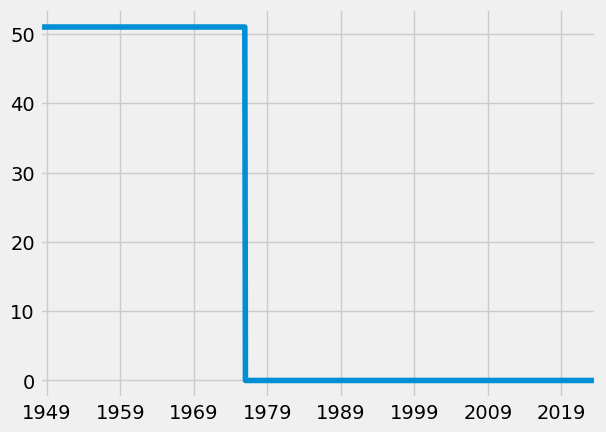

In [36]:
participation_states.isna().sum(axis=1).plot()

In [37]:
participation_states = participation_states.dropna()
participation_states.columns = [participation_id_to_state[col] for col in participation_states.columns]

In [38]:
participation_states

,California,Alabama,Florida,Kentucky,Michigan,Minnesota,Ohio,Wisconsin,New York,Mississippi,Tennessee,Georgia,Pennsylvania,Colorado,Maine,Virginia,Maryland,Texas,Massachusetts,New Mexico,West Virginia,Illinois,Utah,Iowa,North Carolina,South Carolina,Connecticut,Louisiana,Arizona,Nebraska,Oregon,Missouri,Washington,New Jersey,Alaska,Indiana,Arkansas,Oklahoma,Idaho,New Hampshire,Nevada,Hawaii,Vermont,Kansas,North Dakota,Montana,South Dakota,Wyoming,Delaware,Rhode Island,District Of Columbia
1976-01-01,62.6,57.0,55.8,60.5,61.6,65.6,61.7,65.6,58.0,58.8,59.6,63.7,58.4,67.2,62.1,65.9,64.3,63.8,64.8,60.8,52.5,63.0,62.8,64.4,66.5,65.3,64.2,56.8,59.5,64.9,62.9,60.5,60.9,61.5,69.0,64.0,57.9,59.3,63.0,65.9,71.3,69.9,63.6,65.1,62.6,62.7,64.6,65.3,62.7,63.8,64.4
1976-02-01,62.4,56.9,55.7,60.3,61.5,65.5,61.7,65.5,58.0,58.6,59.4,63.6,58.3,67.0,61.9,65.8,64.2,63.5,64.7,60.5,52.4,63.0,62.6,64.3,66.3,65.2,64.1,56.6,59.2,64.9,62.7,60.3,60.7,61.4,68.4,63.9,57.8,59.2,62.8,65.6,70.8,69.6,63.4,65.0,62.4,62.5,64.4,64.9,62.5,63.7,64.5
1976-03-01,62.2,56.8,55.5,60.2,61.5,65.4,61.7,65.4,58.0,58.5,59.3,63.5,58.3,66.8,61.9,65.6,64.1,63.4,64.6,60.3,52.3,62.9,62.5,64.2,66.2,65.0,64.0,56.5,59.1,64.8,62.5,60.3,60.6,61.4,67.8,63.8,57.7,59.1,62.7,65.6,70.5,69.6,63.2,64.9,62.3,62.4,64.4,64.7,62.5,63.6,64.5
1976-04-01,62.2,56.8,55.5,60.1,61.6,65.4,61.6,65.4,58.0,58.5,59.3,63.5,58.3,66.6,61.8,65.5,64.1,63.5,64.6,60.3,52.3,62.9,62.5,64.1,66.2,64.9,64.1,56.4,59.1,64.8,62.4,60.4,60.6,61.5,67.9,63.8,57.7,59.0,62.7,65.7,70.4,69.4,63.5,65.0,62.5,62.3,64.3,64.9,62.4,63.7,64.5
1976-05-01,62.3,56.8,55.4,60.1,61.7,65.5,61.6,65.5,58.1,58.5,59.4,63.6,58.3,66.5,61.7,65.4,64.1,63.6,64.6,60.3,52.2,63.0,62.6,64.1,66.3,64.7,64.3,56.4,59.1,64.8,62.5,60.6,60.7,61.6,67.9,63.9,57.7,59.0,62.8,66.0,70.5,69.3,63.6,65.1,62.6,62.2,64.3,65.2,62.4,63.6,64.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-01,62.5,57.0,59.5,57.8,60.7,68.4,62.2,65.3,61.2,54.5,59.3,61.3,62.0,68.7,58.4,66.6,65.3,64.2,64.6,57.0,54.6,64.6,69.6,68.7,60.7,56.7,64.1,59.5,61.7,69.5,62.0,63.6,64.7,65.4,65.3,63.6,57.6,61.4,62.5,65.2,61.5,60.4,63.8,66.8,69.7,62.8,67.9,64.6,60.0,63.2,70.8
2023-07-01,62.4,57.0,59.7,57.7,61.0,68.5,62.1,65.5,61.4,54.4,59.4,61.4,61.9,68.7,58.5,66.7,65.3,64.2,64.5,57.1,54.7,64.4,69.8,68.8,60.7,56.9,64.1,59.3,61.8,69.4,61.8,63.6,64.7,65.5,65.2,63.6,57.7,61.6,62.4,64.9,61.6,60.3,63.9,66.8,69.7,62.7,67.8,64.6,60.1,63.3,70.8
2023-08-01,62.4,57.0,59.7,57.6,61.3,68.5,62.1,65.7,61.5,54.3,59.4,61.4,61.9,68.7,58.6,66.7,65.3,64.2,64.5,57.2,54.9,64.4,69.8,68.7,60.8,57.0,64.1,59.0,61.8,69.2,61.7,63.7,64.6,65.5,65.2,63.5,57.7,61.8,62.4,64.6,61.7,60.2,64.0,66.7,69.5,62.7,67.8,64.5,60.3,63.3,70.9
2023-09-01,62.3,57.0,59.8,57.4,61.6,68.5,62.1,65.8,61.6,54.1,59.4,61.5,61.9,68.6,58.7,66.8,65.2,64.2,64.4,57.2,55.1,64.5,69.7,68.6,60.9,57.0,64.1,58.9,61.9,69.2,61.7,63.7,64.5,65.4,65.2,63.4,57.8,62.1,62.4,64.6,61.9,60.2,64.1,66.7,69.3,62.6,67.8,64.4,60.5,63.4,71.1


## Visualize Unemployment Rate vs. Participation Rate

In [42]:
unemployment_states = unemployment_states.rename(columns={'the District of Columbia': 'District of Columbia'})
unemployment_states.columns = unemployment_states.columns.str.strip()
unemployment_states.columns

Index(['California', 'Texas', 'New York', 'Florida', 'Michigan', 'Ohio',
       'Alabama', 'Colorado', 'Pennsylvania', 'North Carolina', 'Illinois',
       'Kentucky', 'Massachusetts', 'Minnesota', 'Georgia', 'Wisconsin',
       'Virginia', 'New Jersey', 'Arizona', 'New Mexico', 'Washington',
       'Alaska', 'Maryland', 'Oregon', 'Iowa', 'South Carolina', 'Tennessee',
       'West Virginia', 'Indiana', 'Arkansas', 'Missouri', 'Louisiana', 'Utah',
       'Nevada', 'North Dakota', 'Hawaii', 'Oklahoma', 'Montana',
       'Connecticut', 'Mississippi', 'District of Columbia', 'Kansas', 'Idaho',
       'Wyoming', 'Nebraska', 'New Hampshire', 'Rhode Island', 'Maine',
       'South Dakota', 'Delaware', 'Vermont'],
      dtype='object')

In [43]:
participation_states.columns = participation_states.columns.str.strip()
participation_states.columns

Index(['California', 'Alabama', 'Florida', 'Kentucky', 'Michigan', 'Minnesota',
       'Ohio', 'Wisconsin', 'New York', 'Mississippi', 'Tennessee', 'Georgia',
       'Pennsylvania', 'Colorado', 'Maine', 'Virginia', 'Maryland', 'Texas',
       'Massachusetts', 'New Mexico', 'West Virginia', 'Illinois', 'Utah',
       'Iowa', 'North Carolina', 'South Carolina', 'Connecticut', 'Louisiana',
       'Arizona', 'Nebraska', 'Oregon', 'Missouri', 'Washington', 'New Jersey',
       'Alaska', 'Indiana', 'Arkansas', 'Oklahoma', 'Idaho', 'New Hampshire',
       'Nevada', 'Hawaii', 'Vermont', 'Kansas', 'North Dakota', 'Montana',
       'South Dakota', 'Wyoming', 'Delaware', 'Rhode Island',
       'District Of Columbia'],
      dtype='object')

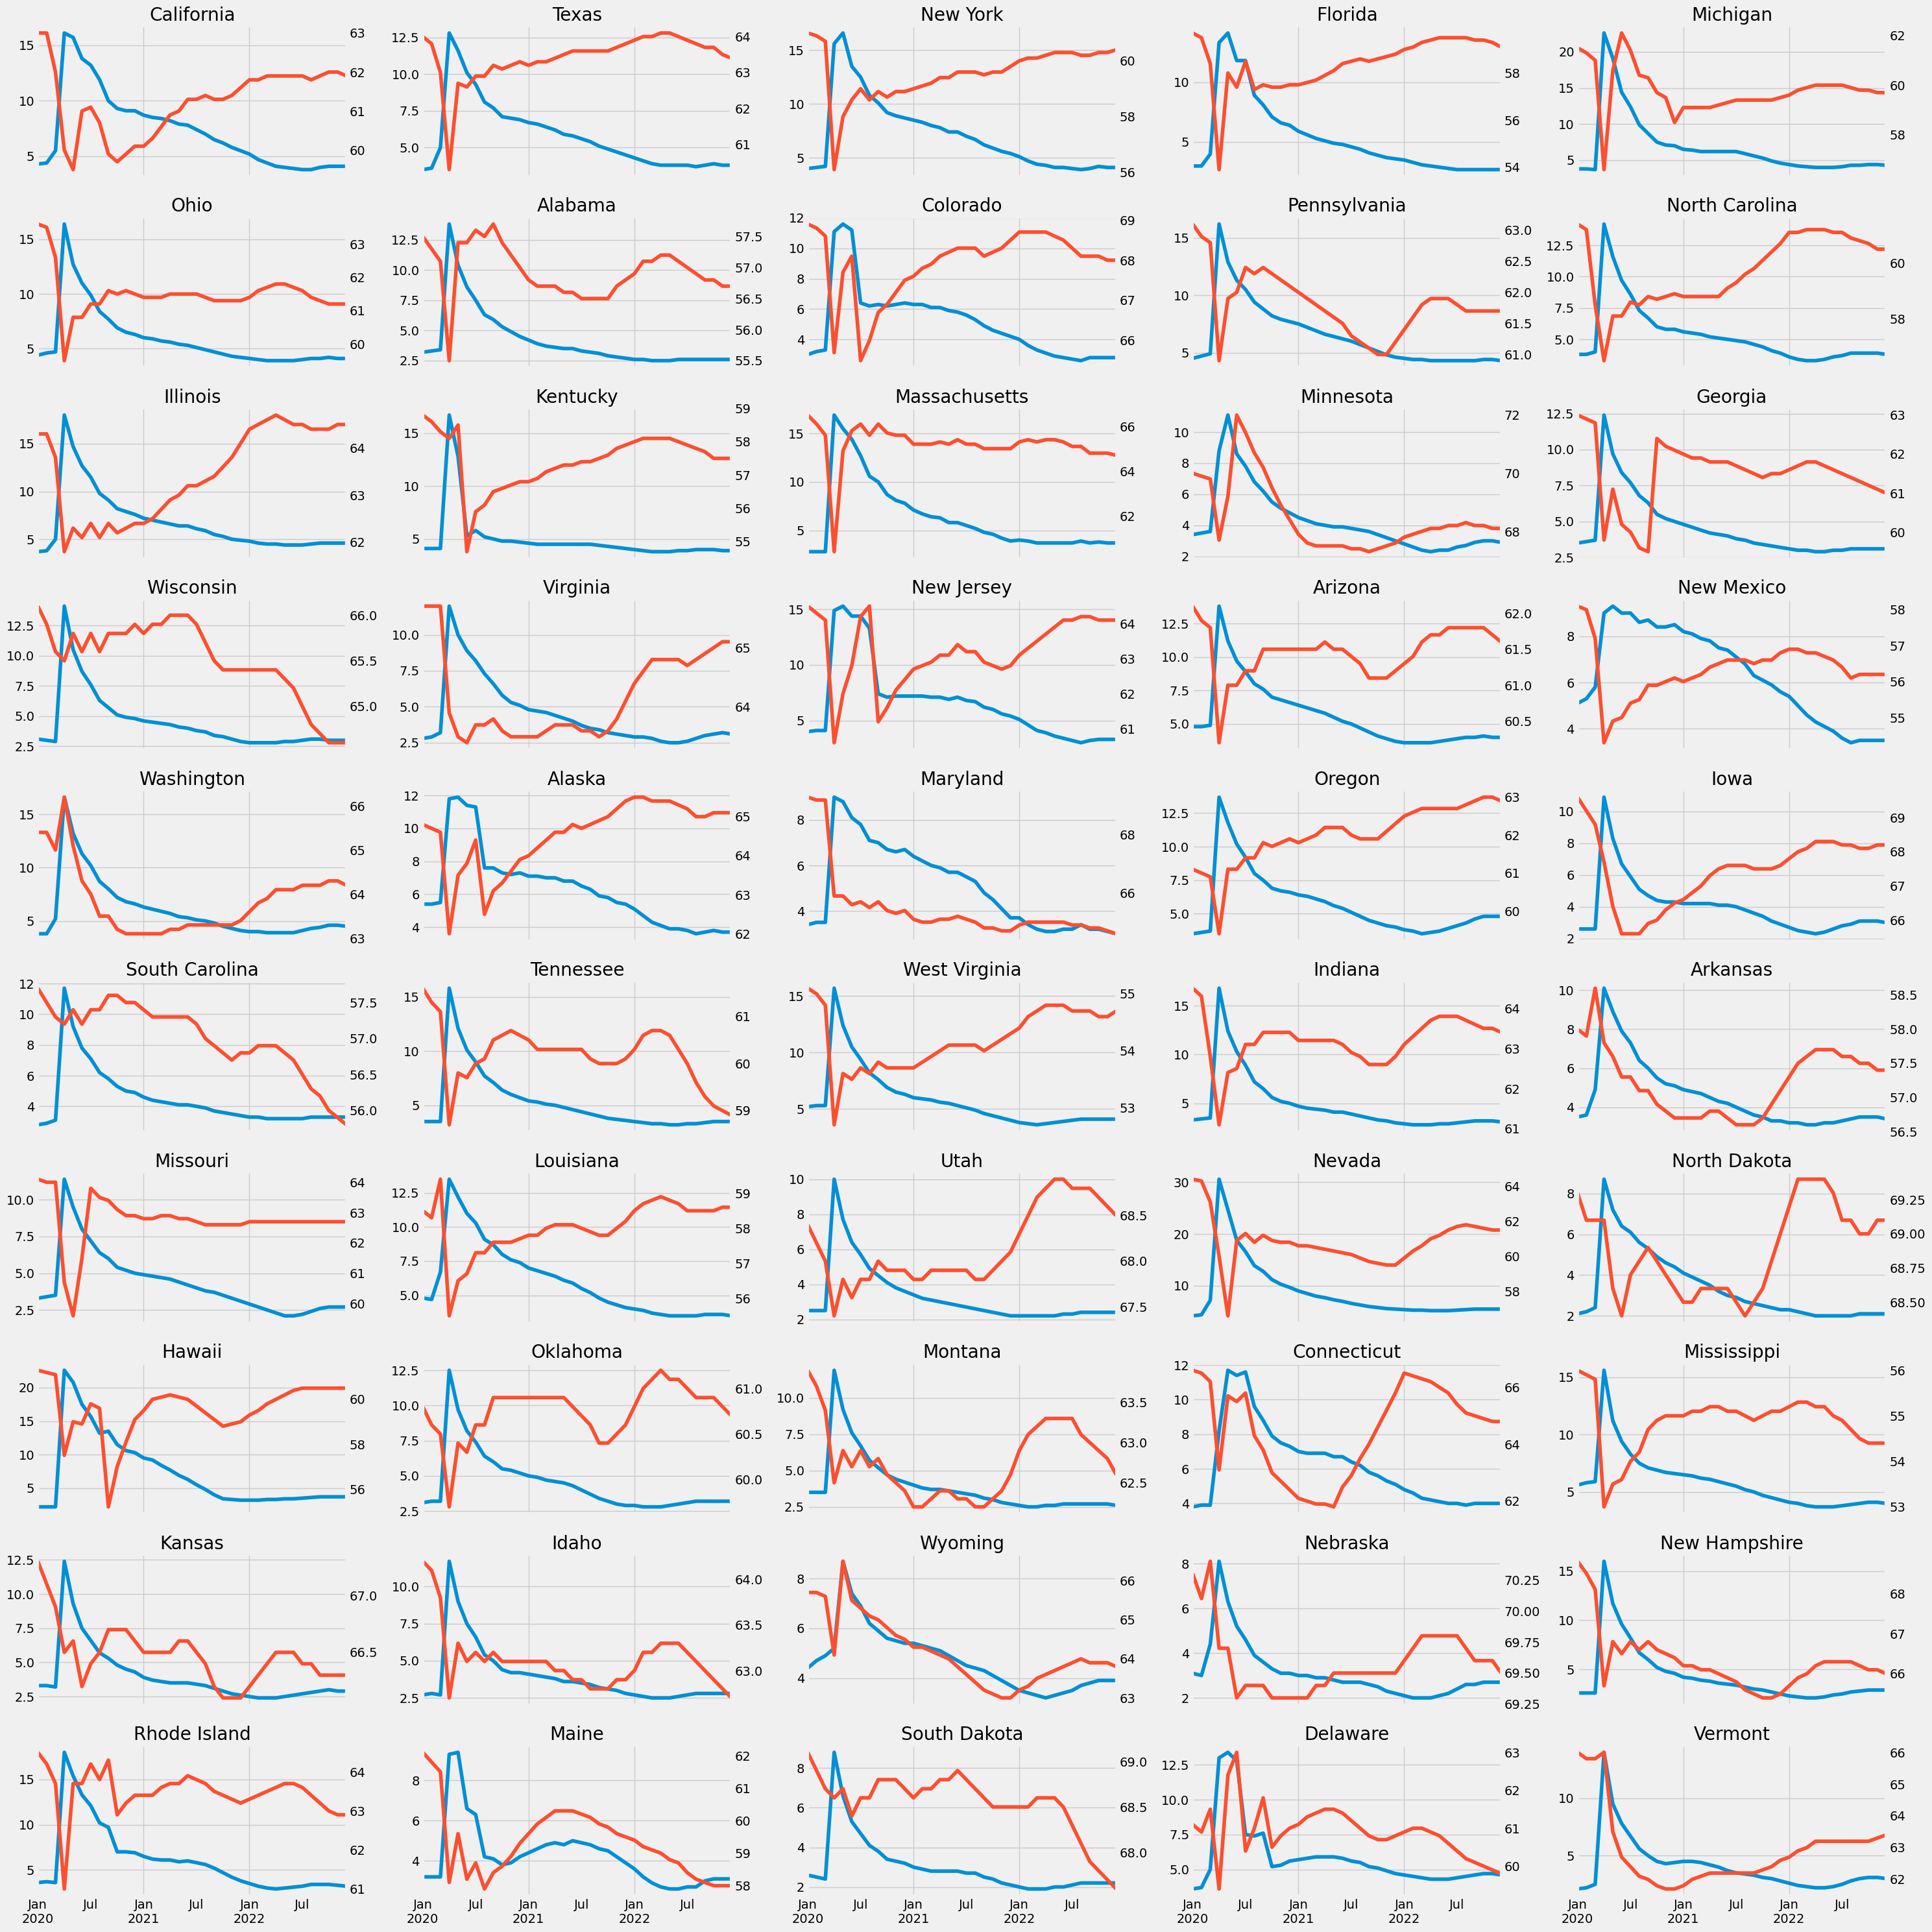

In [44]:
fig, axs = plt.subplots(10, 5, figsize=(30, 30), sharex=True)
axs = axs.flatten()

i = 0
for state in unemployment_states.columns:
    if state == 'District of Columbia':
        continue
        
    ax2 = axs[i].twinx()

    unemployment_states.query('index >= 2020 and index < 2023')[state] \
        .plot(ax=axs[i], label='Unemployment Rate')

    participation_states.query('index >= 2020 and index < 2023')[state] \
        .plot(ax=ax2, label='Participation Rate', color=color_pal[1])

    ax2.grid(False)
    axs[i].set_title(state)
    i += 1
    
plt.tight_layout()
plt.show()

## References

- Rob Mulla. (2022, April 26). _Economic Data Analysis Project with Python Pandas - Data scraping, cleaning and exploration!_ [Video]. YouTube. Retrieved November 22, 2023, from https://youtu.be/R67XuYc9NQ4?si=p0G707HjUCH6r1W-
- _St. Louis Fed Web Services: FRED® API_. (2009). Retrieved November 22, 2023, https://fred.stlouisfed.org/docs/api/fred/